# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


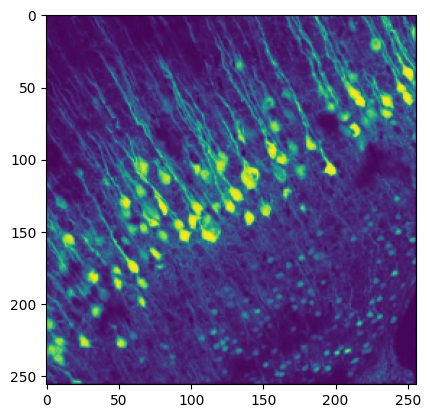

In [14]:
cell_img = plt.imread('data/cells.png')

cell_img = resize(cell_img, (256, 256))
plt.imshow(cell_img)

In [17]:
cell_img.shape

(256, 256)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [20]:
print(cell_img.shape)
cell_ft = np.fft.fft2(cell_img)
print(cell_ft.dtype) 
print(cell_ft.shape)

(256, 256)
complex128
(256, 256)


In [21]:
cell_ft.shape

(256, 256)

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


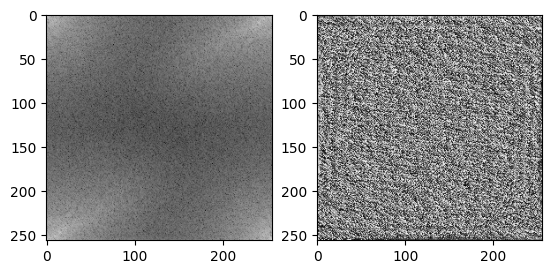

In [22]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')


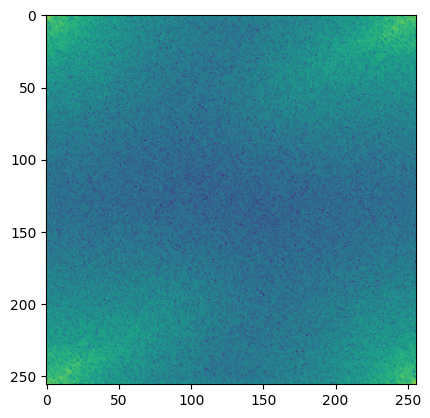

In [26]:
plt.imshow(np.log(amplitude))


In [23]:
amplitude

array([[13495.32026113,   707.7805534 ,   425.46522646, ...,
          502.974161  ,   425.46522646,   707.7805534 ],
       [ 2582.73450709,  3360.25992577,   813.52073603, ...,
          622.26655727,   512.38303265,   834.88865116],
       [  131.99158397,  1337.84891852,   611.89334682, ...,
          146.18589603,   252.02420653,   700.67308049],
       ...,
       [  655.61701184,   245.92451802,   539.39488336, ...,
          395.06662986,   644.69068098,   623.59594855],
       [  131.99158397,   700.67308049,   252.02420653, ...,
          430.09384971,   611.89334682,  1337.84891852],
       [ 2582.73450709,   834.88865116,   512.38303265, ...,
          742.35603981,   813.52073603,  3360.25992577]])

In [25]:
phase

array([[ 0.        , -2.69193551,  1.27924409, ..., -1.86059718,
        -1.27924409,  2.69193551],
       [-2.81803664,  0.4435279 ,  0.16754651, ...,  2.76027676,
        -2.8252515 , -1.58091517],
       [-1.17142908, -2.20771506,  0.09983353, ..., -0.0273744 ,
         2.97763235, -2.98196133],
       ...,
       [-2.17752355, -1.84404642, -1.12789815, ..., -0.00359401,
         3.08745847, -0.79149772],
       [ 1.17142908,  2.98196133, -2.97763235, ...,  0.91057221,
        -0.09983353,  2.20771506],
       [ 2.81803664,  1.58091517,  2.8252515 , ..., -0.09024459,
        -0.16754651, -0.4435279 ]])

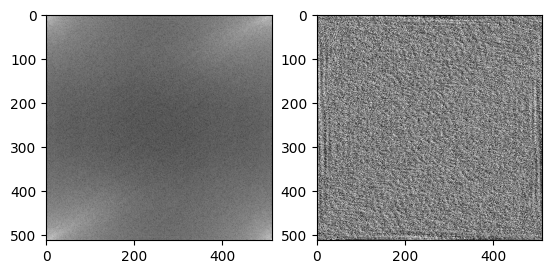

In [6]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


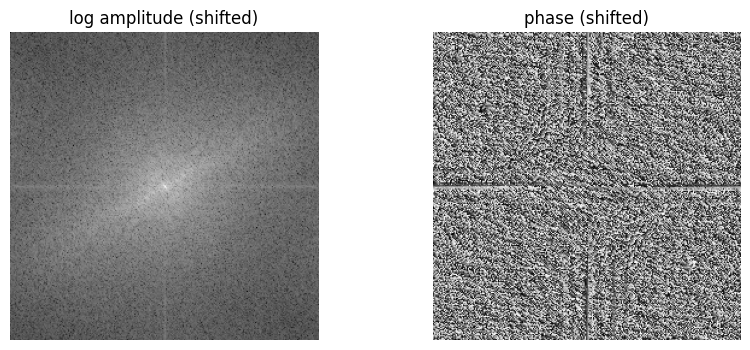

In [ ]:
cell_ft_shift = np.fft.fftshift(cell_ft)

amp_shift = np.abs(cell_ft_shift)
phase_shift = np.angle(cell_ft_shift)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.log(amp_shift + 1e-8), cmap='gray')
plt.title('log amplitude (shifted)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(phase_shift, cmap='gray')
plt.title('phase (shifted)')
plt.axis('off')

plt.show()


In [37]:
cell_phase = phase_shift
cell_amp = amp_shift

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


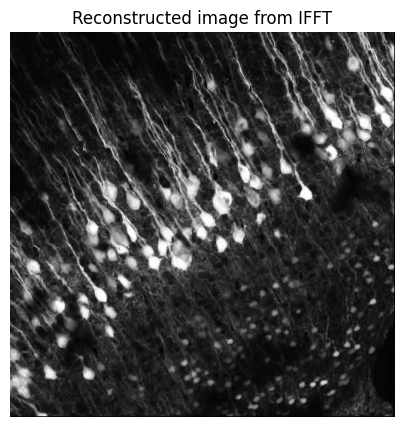

In [8]:
# 如果使用的是 shift 后的频谱，需要先 ifftshift 回来
cell_ft_unshift = np.fft.ifftshift(cell_ft_shift)

cell_img_rec_complex = np.fft.ifft2(cell_ft_unshift)
cell_img_rec = cell_img_rec_complex.real  # 只取实部

plt.figure(figsize=(5, 5))
plt.imshow(cell_img_rec, cmap='gray')
plt.axis('off')
plt.title('Reconstructed image from IFFT')
plt.show()


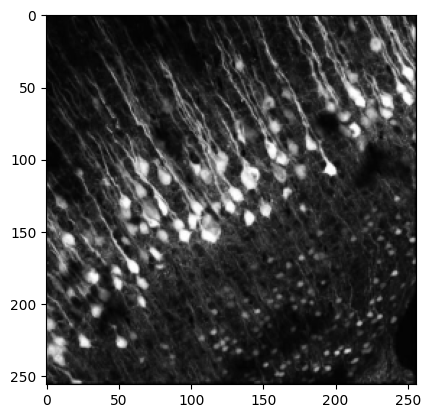

In [27]:
plt.imshow(cell_img,cmap="gray")

---


**[Task 2 (a).]()** Load the brain MR image.


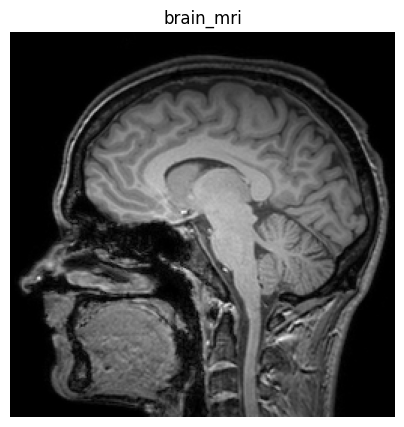

In [ ]:
brain = plt.imread('data/brain_mri.png')

plt.figure(figsize=(5, 5))
plt.imshow(brain, cmap='gray')
plt.axis('off')
plt.title('brain_mri')
plt.show()


**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


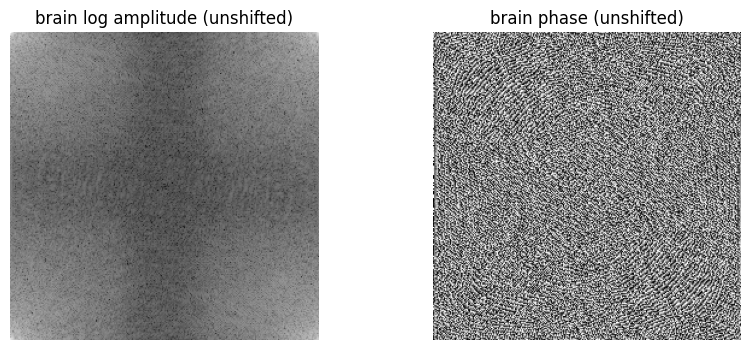

In [39]:
brain_ft = np.fft.fft2(brain)
brain_amp_unshift = np.abs(brain_ft)
brain_phase_unshift = np.angle(brain_ft)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.log(brain_amp_unshift + 1e-8), cmap='gray')
plt.title('brain log amplitude (unshifted)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(brain_phase_unshift, cmap='gray')
plt.title('brain phase (unshifted)')
plt.axis('off')

plt.show()

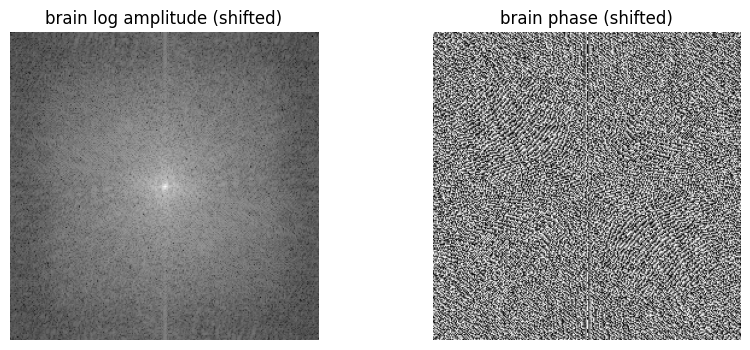

In [29]:
brain_ft = np.fft.fft2(brain)
brain_ft_shift = np.fft.fftshift(brain_ft)

brain_amp = np.abs(brain_ft_shift)
brain_phase = np.angle(brain_ft_shift)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.log(brain_amp + 1e-8), cmap='gray')
plt.title('brain log amplitude (shifted)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(brain_phase, cmap='gray')
plt.title('brain phase (shifted)')
plt.axis('off')

plt.show()


In [11]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


In [34]:
merged_bc_shift = to_complex_array(brain_amp, cell_phase)


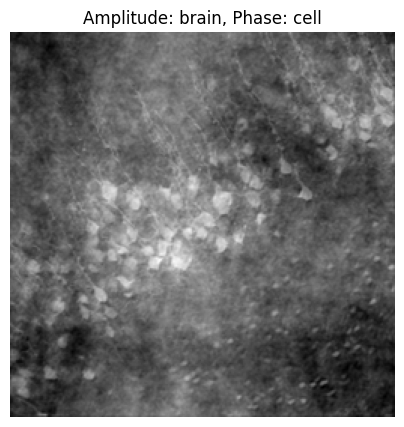

In [35]:
merged_bc_unshift = np.fft.ifftshift(merged_bc_shift)
merged_bc_complex = np.fft.ifft2(merged_bc_unshift)
merged_bc = merged_bc_complex.real

plt.figure(figsize=(5, 5))
plt.imshow(merged_bc, cmap='gray')
plt.axis('off')
plt.title('Amplitude: brain, Phase: cell')
plt.show()

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


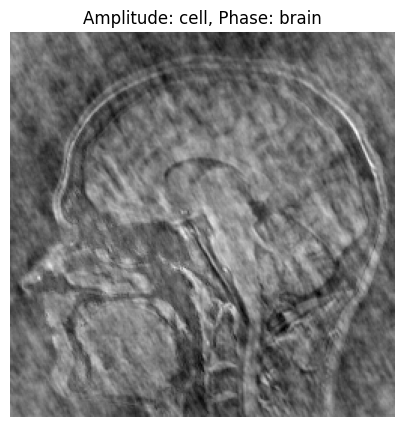

In [38]:
# cell 的 amplitude + brain 的 phase
merged_cb_shift = to_complex_array(cell_amp, brain_phase)

merged_cb_unshift = np.fft.ifftshift(merged_cb_shift)
merged_cb_complex = np.fft.ifft2(merged_cb_unshift)
merged_cb = merged_cb_complex.real

plt.figure(figsize=(5, 5))
plt.imshow(merged_cb, cmap='gray')
plt.axis('off')
plt.title('Amplitude: cell, Phase: brain')
plt.show()


---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [41]:
filter_window_size = 50

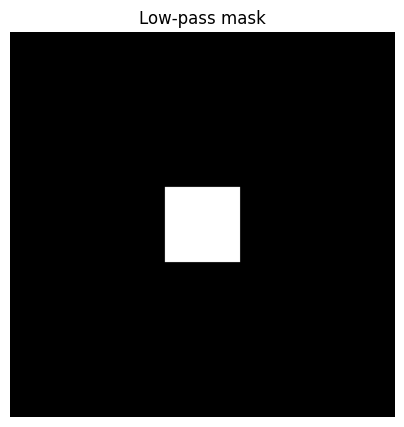

In [42]:
# 假设 brain_amp_shift 的大小是 (H, W)
H, W = brain_amp.shape

# 创建全 0 mask
lowpass_mask = np.zeros((H, W))

# 计算中心位置
center_y = H // 2
center_x = W // 2

# 半尺寸（因为方块要从中心向四周扩散）
half = filter_window_size // 2

# 把中心小方块设置为 1
lowpass_mask[center_y - half : center_y + half,
             center_x - half : center_x + half] = 1

# 显示 mask
plt.figure(figsize=(5, 5))
plt.imshow(lowpass_mask, cmap='gray')
plt.title('Low-pass mask')
plt.axis('off')
plt.show()


**[Task 3 (b).]()** Create a highpass filter maks.


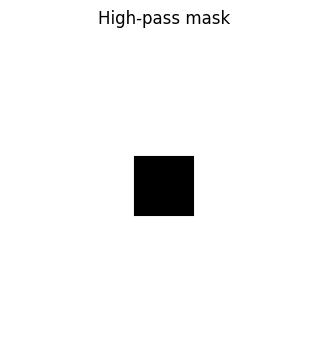

In [43]:
# Task 3(b). Create a highpass filter mask.
highpass_mask = 1 - lowpass_mask

plt.figure(figsize=(4,4))
plt.imshow(highpass_mask, cmap='gray')
plt.title('High-pass mask')
plt.axis('off')
plt.show()


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


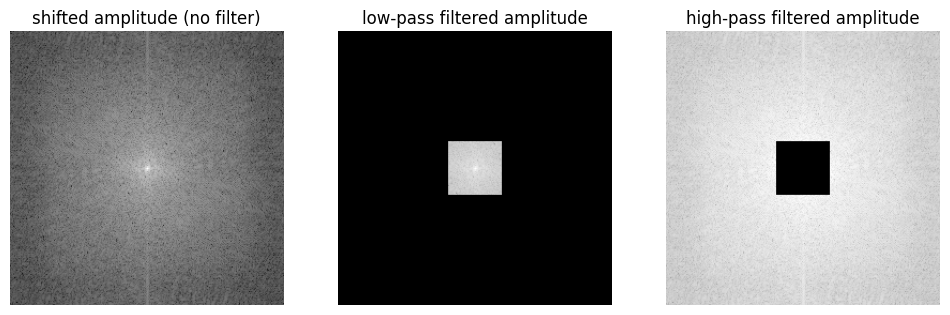

In [47]:
# 用 mask 乘在“shift 后的 amplitude”上
brain_amp_low  = brain_amp * lowpass_mask     # 低通后的幅度
brain_amp_high = brain_amp * highpass_mask    # 高通后的幅度

# 显示：原始 amplitude / 低通 / 高通
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.log(brain_amp + 1e-8), cmap='gray')
plt.title('shifted amplitude (no filter)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(brain_amp_low + 1e-8), cmap='gray')
plt.title('low-pass filtered amplitude')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.log(brain_amp_high + 1e-8), cmap='gray')
plt.title('high-pass filtered amplitude')
plt.axis('off')

plt.show()


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


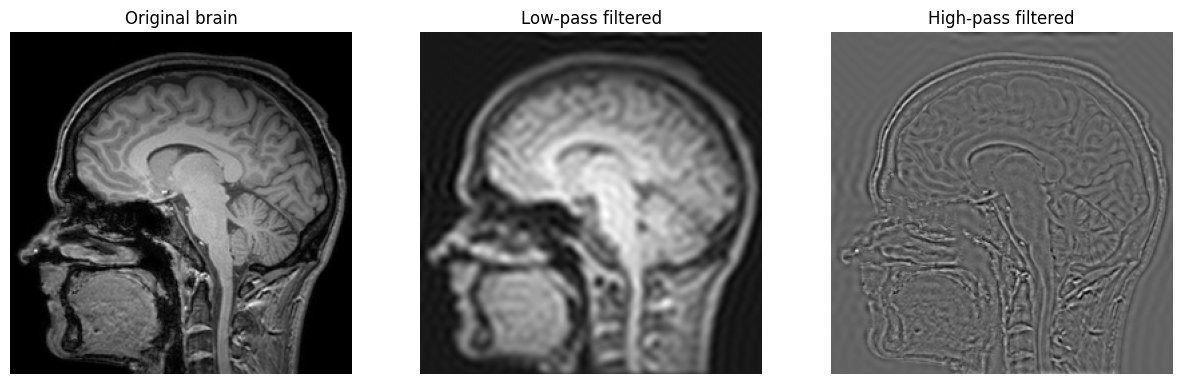

In [48]:
# 低通/高通后的振幅
brain_amp_low  = brain_amp * lowpass_mask
brain_amp_high = brain_amp * highpass_mask

# 振幅 + 原相位 → 复数频谱（仍然是 shifted 版本）
brain_ft_low_shift  = to_complex_array(brain_amp_low,  brain_phase)
brain_ft_high_shift = to_complex_array(brain_amp_high, brain_phase)

# 先 ifftshift 再 ifft2 还原图像
brain_ft_low  = np.fft.ifftshift(brain_ft_low_shift)
brain_ft_high = np.fft.ifftshift(brain_ft_high_shift)

brain_low_rec_complex  = np.fft.ifft2(brain_ft_low)
brain_high_rec_complex = np.fft.ifft2(brain_ft_high)

# 只取实部
brain_low_rec  = brain_low_rec_complex.real
brain_high_rec = brain_high_rec_complex.real

# 显示：原图 + 低通 + 高通
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(brain, cmap='gray')
plt.title('Original brain')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(brain_low_rec, cmap='gray')
plt.title('Low-pass filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(brain_high_rec, cmap='gray')
plt.title('High-pass filtered')
plt.axis('off')

plt.show()


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [ ]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
